In [121]:
import scipy.integrate
import numpy
import matplotlib.pyplot
import os
import json
import scipy.interpolate
#for partial specialization
import cModel
import importlib
importlib.reload(cModel)
import time
import ivp
importlib.reload(ivp)
import runSolver
importlib.reload(runSolver)

#run solver
#setupFile=os.path.join(fh,'software','src','PBPK','setup','setup.json')
#modelFile=os.path.join(fh,'software','src','PBPK','models','humanHG.json')
#parameterFile=os.path.join(fh,'software','src','PBPK','models','humanHG_parameters1.json')
#runSolver.main([setupFile,modelFile,parameterFile],os.path.join(os.path.expanduser('~'),'temp'))


<module 'runSolver' from '/home/studen/software/src/PBPK/pythonScripts/runSolver.py'>

*************inspect************
***********done************
(17, 17)
15
[ 0.          0.          0.          0.          0.          0.
  0.          0.12434798 -0.00099998  0.          0.          0.
  0.          0.          0.          0.          0.        ]


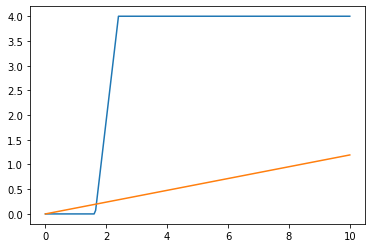

In [133]:
sys=cModel.model()
fh=os.path.expanduser('~')
#sys.parse(os.path.join(fh,'software','src','Integra','models','cDiazepam.json'))
setupFile=os.path.join(fh,'software','src','PBPK','models','humanHG.json')
parameterFile=os.path.join(fh,'software','src','PBPK','models','humanHG_parameters1.json')
sys.parse(setupFile,parameterFile)
#print(sys.u(10)[sys.lut['venous']])
print("*************inspect************")

#sys.inspect()    

print("***********done************")
print(sys.M(1).shape)
#print(sys.fSS(2))
print(sys.m)

nt=201
qtmax=24*60*365*10
qt=numpy.linspace(0,qtmax,nt)
fw=sys.get('fetusWeight')
#ft=[fw['derivatives']['fetusGrowthDuration'](x) for x in qt]
ft=[fw['value'](x) for x in qt]
hw=sys.get('hairVolume')
ht=[10*hw['value'](x) for x in qt]
matplotlib.pyplot.plot(qt/tscale,ft)
matplotlib.pyplot.plot(qt/tscale,ht)
#start_time=time.time()
#for i in range(100000):
#    sys.M(1)
#end_time=time.time()
#print('Time: {:.3f} s'.format(end_time-start_time))
print(sys.M(1000)[8,:])

Calculating for hairPCBlood/0:(10645, 17) [24664.976951005923]
Calculating for hairVolumeFraction/1:(10645, 17) [8.925742052568391e-07]
Done simultaneous LSODA SE
Time: 11.279 s


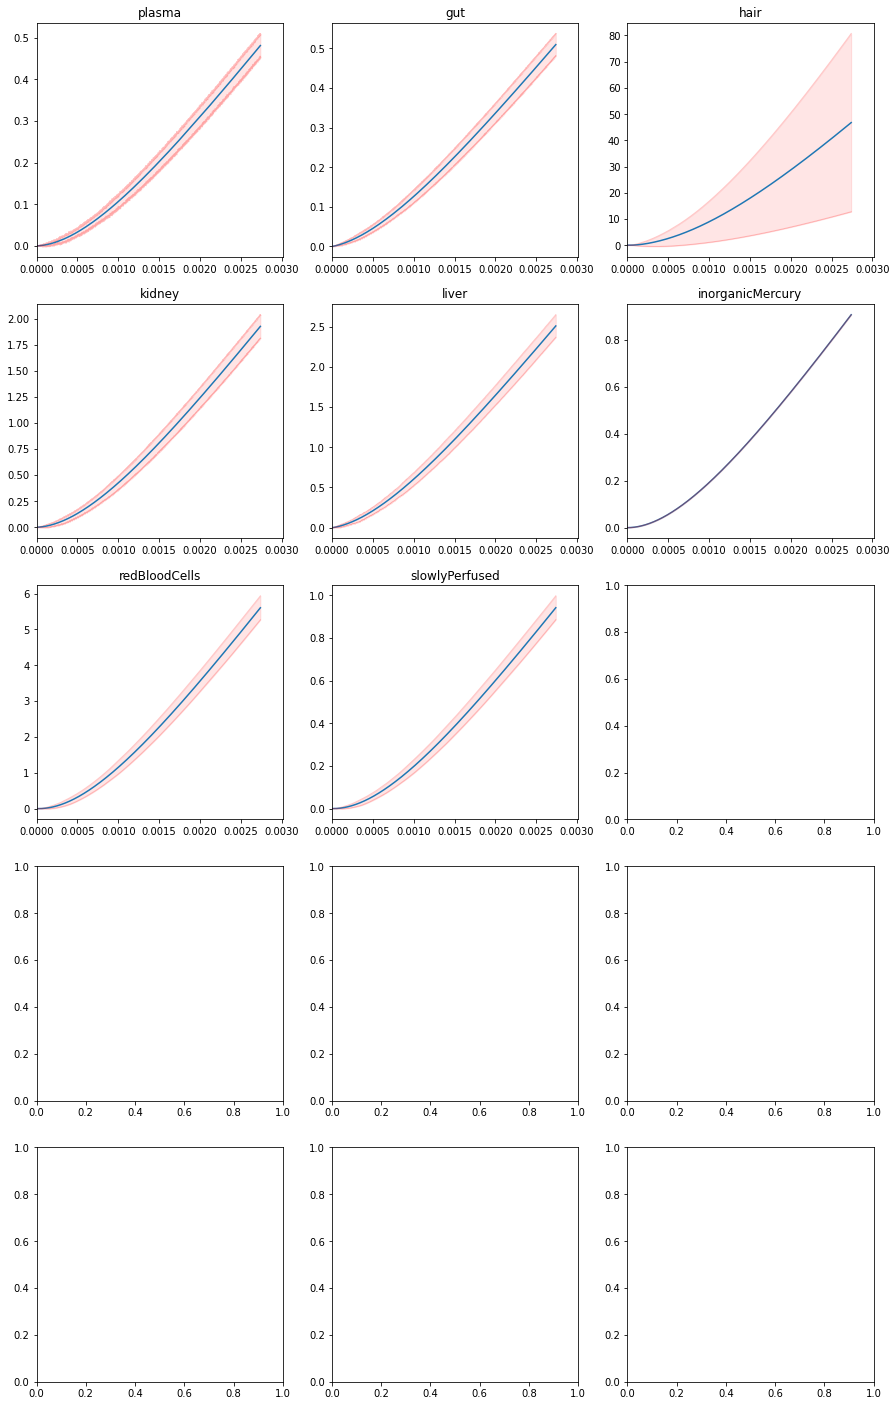

In [112]:
# #copy output of Thompson et al1
tscale=24*60*365
fig, axs = matplotlib.pyplot.subplots(5, 3,figsize=(15,25))
name=['arterial','adipose','brain','heart','kidney','liver','lung','muscle','skin',
      'splanchnic','stomach','testes','excrement']
name=['plasma','gut','hair','kidney','liver','inorganicMercury','redBloodCells','slowlyPerfused']

#diazepam
max=[1.5,2.6,3,4,5,2.5,6.8,1.5,1.5,4,4.2,3,25]
#cotinine
max=[9]*13
max[12]=90
max[2]=2


max=[1000*x for x in max]
for i in range(len(name)):
    row=i//3
    col=i%3
    fy=sol[:,sys.lut[name[i]]]
    fe=se[:,sys.lut[name[i]]]
    ax=axs[row,col]
    ax.plot(t/tscale,fy)
    ax.fill_between(t/tscale, fy-fe, fy + fe, color='red',alpha=0.1)
    ax.plot(t/tscale,fy-fe,color='red',linewidth=1,alpha=0.2)
    ax.plot(t/tscale,fy+fe,color='red',linewidth=1,alpha=0.2)
    axs[row,col].set_title(name[i])
    #axs[row,col].set_ylim([0,max[i]])
    axs[row,col].set_xlim([0,1.1*tmax/tscale])


7


7440

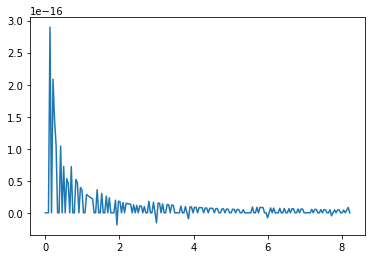

In [25]:
#gD=sys.get("hairGrowthDuration")
#print(gD['value']/60/24/365)
print(sys.lut['slowlyPerfused'])
ft=[sys.fSS(x)[0,8,7] for x in qt]
#matplotlib.pyplot.imshow(sys.fSS(3e6)[0])
matplotlib.pyplot.plot(qt/tscale,ft)
30*248